# INTRODUCTION
In this project, we will understand the features that affect the Sale Price of housing in Ames, Iowa. We aim to find a production model that we can use to get a good score on Kaggle, as well as find business insights on what helps to increase Sale Price.

We break this into 3 notebooks:

(1) EDA and Cleaning: preliminary cleaning of data to remove missing values

(2) Features Selection: detailed analysis of each of the 80 columns in the dataset to select relevant features for modelling

(3) Model Selection and Predictions: scoring various models with and without scaling to select the best model for Kaggle submission, and get business insights through an interpretable model

# (1) EDA and Cleaning
In this notebook, we will do a preliminary EDA and Cleaning of the data and save the cleaned file as cleaned_train.csv.

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load datasets
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

In [3]:
# check column names, missing values, datatypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

## Columns with Null Values in Train Data
We will treat the columns with null values in 3 ways.

### (A) Only 1 to 2 missing values out of 2051 rows
The 8 features are BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Bsmt Full Bath, Bsmt Half Bath, Garage Cars, Garage Area

Drop these rows immediately. 

### (B) More than 20% values missing
The 5 features are Alley, Fireplace Qu, Pool QC, Fence and Misc Feature.

Based on information in [this article](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt):

NaN values in 'Alley' is likely to be No Access - check if non-null values has category NA (No Access).

NaN values in 'Fireplace Qu' is likely to be No Fireplace - check if corresponding 'Fireplaces' has value 0.

NaN values in 'Pool QC' is likely to be No Pool - check if corresponding 'Pool Area' has value 0.

NaN values in 'Fence' is likely to be No Fence - check if non-null values has category NA (No Fence).

NaN values in 'Misc Feature' is likely to be None - check if non-null values has category NA (None).

### (C) Less than 20% values missing
The 13 features are Lot Frontage, Mas Vnr Type, Mas Vnr Area, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin Type 2, Garage Type, Garage Yr Blt, Garage Finish, Garage Qual, Garage Cond.

We look through [this article](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) again to see if any of them should be treated the same way as (B).

Lot Frontage is a length in feet, so we check if there are existing values = 0 to see if the missing values should be 0 or should be imputed using regression if we want to use this feature to predict SalePrice later.

NaN values in 'Mas Vnr Type' is likely to be None - check if non-null values has category None. We also check if 'Mas Vnr Area' has existing values = 0, and if the missing values are the same rows as the missing values in 'Mas Vnr Type'.

'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1' and 'BsmtFin Type 2' all should have a category NA (No Basement). However, there are 1 and 3 more missing values respectively for 'Bsmt Exposure' and 'BsmtFin Type 2'. We look at this again after dropping the rows in (A) again, to see if these numbers will tally.

'Garage Type', 'Garage Finish', 'Garage Qual' and 'Garage Cond' all should have a category NA (No Garage). NaN values in 'Garage Yr Blt' is likely also for properties with No Garage. However, there is one less missing value for 'Garage Type' than the others. We look at this again after dropping the rows in (A) again, to see if these numbers will tally.


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

## Columns with Null Values in Test Data
Revisit this after EDA and Cleaning of Train Data.

In [5]:
# rename column names to replace space with underscore
test.columns = test.columns.str.replace(' ', '_')
train.columns = train.columns.str.replace(' ', '_')

## (A) Only 1 to 2 missing values out of 2051 rows

In [6]:
# remove rows of features in Train Data with only 1 or 2 missing values
features_A = ['BsmtFin_SF_1', 
              'BsmtFin_SF_2', 
              'Bsmt_Unf_SF', 
              'Total_Bsmt_SF', 
              'Bsmt_Full_Bath', 
              'Bsmt_Half_Bath', 
              'Garage_Cars', 
              'Garage_Area'
             ]
train.dropna(subset=features_A, inplace=True)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2048 non-null   int64  
 1   PID              2048 non-null   int64  
 2   MS_SubClass      2048 non-null   int64  
 3   MS_Zoning        2048 non-null   object 
 4   Lot_Frontage     1718 non-null   float64
 5   Lot_Area         2048 non-null   int64  
 6   Street           2048 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot_Shape        2048 non-null   object 
 9   Land_Contour     2048 non-null   object 
 10  Utilities        2048 non-null   object 
 11  Lot_Config       2048 non-null   object 
 12  Land_Slope       2048 non-null   object 
 13  Neighborhood     2048 non-null   object 
 14  Condition_1      2048 non-null   object 
 15  Condition_2      2048 non-null   object 
 16  Bldg_Type        2048 non-null   object 
 17  House_Style   

### Effect of Removing Rows
Only 3 rows were affected by these 8 features with 1 or 2 missing values.

We note that now the features on Basement with missing values still do not all have the same number of non-null values, while the features on Garage do.


## (B) More than 20% values missing

In [8]:
# check features with more than 20% values missing
features_B = ['Alley', 
              'Fireplace_Qu', 
              'Pool_QC', 
              'Fence',
              'Misc_Feature'
             ]
for feature in features_B:
    print(train[feature].value_counts())
    print()

Grvl    85
Pave    55
Name: Alley, dtype: int64

Gd    522
TA    407
Fa     59
Po     31
Ex     31
Name: Fireplace_Qu, dtype: int64

Gd    4
Fa    2
TA    2
Ex    1
Name: Pool_QC, dtype: int64

MnPrv    225
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

Shed    56
Gar2     4
Othr     3
TenC     1
Elev     1
Name: Misc_Feature, dtype: int64



In [9]:
# check that all Fireplace_Qu with missing values correspond to Fireplaces == 0
print(train[train.Fireplace_Qu.isna()].Fireplaces.value_counts())
print()
print(train.Fireplaces.value_counts())

0    998
Name: Fireplaces, dtype: int64

0    998
1    898
2    145
3      6
4      1
Name: Fireplaces, dtype: int64


In [10]:
# check that all Pool_QC with missing values correspond to Pool_Area == 0
print(train[train.Pool_QC.isna()].Pool_Area.value_counts())
print()
print(train.Pool_Area.value_counts())

0    2039
Name: Pool_Area, dtype: int64

0      2039
519       1
576       1
800       1
228       1
480       1
648       1
738       1
368       1
561       1
Name: Pool_Area, dtype: int64


### Impute Features with 'N_A'
The reasons for the missing values are as expected, so we impute them with N_A.

In [11]:
# impute missing values with N_A
for feature in features_B:
    train[feature].fillna('N_A', inplace=True)

## (C) Less than 20% values missing

In [12]:
# investigate features with less than 20% missing values 
features_C = ['Lot_Frontage', 
              'Mas_Vnr_Type', 'Mas_Vnr_Area', 
              'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_Type_2', 
              'Garage_Type', 'Garage_Yr_Blt', 'Garage_Finish', 'Garage_Qual', 'Garage_Cond'
             ]

### Lot Frontage
Lot Frontage is a length in feet, so we check if there are existing values = 0 to see if the missing values should be 0 or should be imputed using regression if we want to use this feature to predict SalePrice later.

In [13]:
# investigate Lot Frontage
train.Lot_Frontage.sort_values()

53      21.0
787     21.0
796     21.0
135     21.0
1982    21.0
        ... 
2016     NaN
2022     NaN
2028     NaN
2031     NaN
2047     NaN
Name: Lot_Frontage, Length: 2048, dtype: float64

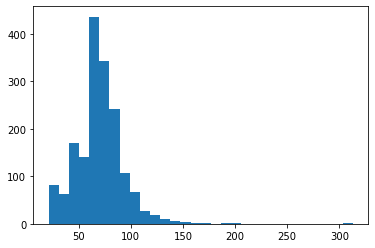

In [14]:
# plot histogram of Lot Frontage of Train Data
plt.hist(train.Lot_Frontage, bins = 30)
plt.show()

In [15]:
# Look at rows with large Lot Frontage
train[train.Lot_Frontage > 200]

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,N_A,IR3,Bnk,...,0,480,Gd,N_A,N_A,0,1,2008,New,160000
1335,1266,535427070,20,RL,313.0,27650,Pave,N_A,IR2,HLS,...,0,0,N_A,N_A,N_A,0,11,2008,WD,242000


There are two unusually large values exceeding 300. We see if we wish remove these outliers if the test data does not have such large values.

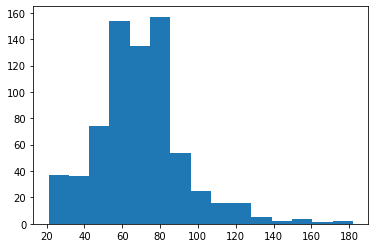

In [16]:
# plot histogram of Lot Frontage of Test Data
plt.hist(test.Lot_Frontage, bins = 15)
plt.show()

In [17]:
test.Lot_Frontage.max()

182.0

Since largest Lot Frontage in the test set is only 182.0, we remove the 2 rows with values exceeding 300.

In [18]:
# Remove rows 960 and 1335
train.drop(index=[960, 1335], inplace=True)

#### Conclusion on Lot Frontage
There is a possibility that the missing values should be 0, though they also may really just be missing at random, so we leave them and decide only when modelling.

We then look at train.info( ) again to see how many missing values we have for the remaining features to investigate.

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2046 non-null   int64  
 1   PID              2046 non-null   int64  
 2   MS_SubClass      2046 non-null   int64  
 3   MS_Zoning        2046 non-null   object 
 4   Lot_Frontage     1716 non-null   float64
 5   Lot_Area         2046 non-null   int64  
 6   Street           2046 non-null   object 
 7   Alley            2046 non-null   object 
 8   Lot_Shape        2046 non-null   object 
 9   Land_Contour     2046 non-null   object 
 10  Utilities        2046 non-null   object 
 11  Lot_Config       2046 non-null   object 
 12  Land_Slope       2046 non-null   object 
 13  Neighborhood     2046 non-null   object 
 14  Condition_1      2046 non-null   object 
 15  Condition_2      2046 non-null   object 
 16  Bldg_Type        2046 non-null   object 
 17  House_Style   

### Masonry Veneer (Type and Area)

There are now 2024/2046 non-null values in these 2 features.

NaN values in 'Mas Vnr Type' is likely to be None - check if non-null values has category None. We also check if 'Mas Vnr Area' has existing values = 0, and if the missing values are the same rows as the missing values in 'Mas Vnr Type'.

In [20]:
train.Mas_Vnr_Type.value_counts()

None       1214
BrkFace     630
Stone       167
BrkCmn       13
Name: Mas_Vnr_Type, dtype: int64

In [21]:
# double check Test Data
test.Mas_Vnr_Type.value_counts()

None       534
BrkFace    250
Stone       80
BrkCmn      12
CBlock       1
Name: Mas_Vnr_Type, dtype: int64

In the Train Data, 'None' appears as one of the categories but 'CBlock' (Cinder Block) did not.

In the Test Data, 'CBlock' also appeared, but only once. 

The proportion of missing data in the Train Data is 22/2046 = 1%, while the proportion of 'CBlock' in the Test Data is 1/877 = 0.1%, so it may be risky to immediately assume that the missing data should be 'CBlock'.

In [22]:
train.Mas_Vnr_Area.value_counts()

0.0      1212
120.0      11
176.0      10
200.0      10
108.0       9
         ... 
142.0       1
215.0       1
235.0       1
233.0       1
426.0       1
Name: Mas_Vnr_Area, Length: 372, dtype: int64

There are only 1212 'Mas_Vnr_Area' with value 0.0 while there are 1214 'Mas_Vnr_Type' with 'None'.

We explore below the area with type == None as well as type with area == 0.

In [23]:
train[train.Mas_Vnr_Type.isnull()].Mas_Vnr_Area.value_counts()

Series([], Name: Mas_Vnr_Area, dtype: int64)

In [24]:
train[train.Mas_Vnr_Type == 'None'].Mas_Vnr_Area.value_counts()

0.0      1209
1.0         3
288.0       1
344.0       1
Name: Mas_Vnr_Area, dtype: int64

In [25]:
train[train.Mas_Vnr_Area == 0.0].Mas_Vnr_Type.value_counts()

None       1209
BrkFace       2
Stone         1
Name: Mas_Vnr_Type, dtype: int64

#### Conclusion on 'Mas_Vnr_Type' and 'Mas_Vnr_Area'
No conclusive way of interpreting the missing values, though we may guess that the missing values in 'Mas_Vnr_Type' may be 'CBlock'. We leave the data as it is and decide when modelling if needed.

### Basement
'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1' and 'BsmtFin Type 2' all should have a category NA (No Basement). However, there are 1 and 3 more missing values respectively for 'Bsmt Exposure' and 'BsmtFin Type 2'.

In [26]:
features_Bsmt = features_C[3:8]
features_Bsmt

['Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_Type_2']

In [27]:
for feature in features_Bsmt:
    print(train[feature].value_counts())
    print()

TA    887
Gd    862
Ex    183
Fa     60
Po      1
Name: Bsmt_Qual, dtype: int64

TA    1831
Gd      89
Fa      65
Po       5
Ex       3
Name: Bsmt_Cond, dtype: int64

No    1338
Av     288
Gd     201
Mn     163
Name: Bsmt_Exposure, dtype: int64

GLQ    613
Unf    603
ALQ    292
BLQ    200
Rec    183
LwQ    102
Name: BsmtFin_Type_1, dtype: int64

Unf    1746
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin_Type_2, dtype: int64



### Impute Basement Features with 'N_A'
The reasons for the missing values are as expected, so we impute them with N_A.

In [28]:
# impute missing values with N_A
for feature in features_Bsmt:
    train[feature].fillna('N_A', inplace=True)

Now let us look at the rows where 'Bsmt Exposure' and 'BsmtFin Type 2' are missing while other Basement Features are not missing.

In [29]:
train[((train.Bsmt_Exposure == 'N_A') | (train.BsmtFin_Type_2 == 'N_A')) & (train.Bsmt_Cond != 'N_A')][features_Bsmt]

,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_Type_2
1147,Gd,TA,No,GLQ,N_A
1456,Gd,TA,N_A,Unf,Unf
1547,Gd,TA,N_A,Unf,Unf
1997,Gd,TA,N_A,Unf,Unf


In [30]:
train[train.BsmtFin_Type_1 == 'GLQ'].BsmtFin_Type_2.value_counts()

Unf    567
Rec     17
ALQ     11
LwQ     11
BLQ      6
N_A      1
Name: BsmtFin_Type_2, dtype: int64

In [31]:
train.BsmtFin_Type_2.value_counts()

Unf    1746
Rec      80
LwQ      60
N_A      54
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin_Type_2, dtype: int64

#### Conclusion on Basement Features
Row 1147 BsmtFin_Type_1 is the top grade 'Good Living Quarters', and the spread of BsmtFin_Type_2 is similar whether we filter for BsmtFin_Type_1 == 'GLQ' or not, so we cannot make a good guess on the possible BsmtFin_Type_2 for this missing value.

For the other 3 rows, we also have no clue on what Bsmt_Exposure is more likely to be, so we leave all 4 rows as it is, with the missing values all imputed as 'NA'.

### Garage
'Garage Type', 'Garage Finish', 'Garage Qual' and 'Garage Cond' all should have a category NA (No Garage). NaN values in 'Garage Yr Blt' is likely also for properties with No Garage.

In [32]:
features_Garage_nominal = features_C[8:9] + features_C[10:]
features_Garage_nominal

['Garage_Type', 'Garage_Finish', 'Garage_Qual', 'Garage_Cond']

In [33]:
for feature in features_Garage_nominal:
    print(train[feature].value_counts())
    print()

Attchd     1210
Detchd      534
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage_Type, dtype: int64

Unf    847
RFn    578
Fin    508
Name: Garage_Finish, dtype: int64

TA    1828
Fa      82
Gd      18
Ex       3
Po       2
Name: Garage_Qual, dtype: int64

TA    1864
Fa      47
Gd      12
Po       8
Ex       2
Name: Garage_Cond, dtype: int64



In [34]:
train[train.Garage_Yr_Blt.isna()][features_Garage_nominal].value_counts()

Series([], dtype: int64)

#### Conclusion on Garage Features
As expected, the missing values all refer to No Garage, so we impute the nominal features with 'N_A' and leave the Garage_Yr_Blt as NaN.

In [35]:
# impute missing values with N_A
for feature in features_Garage_nominal:
    train[feature].fillna('N_A', inplace=True)

### Save Cleaned Train Data
We take one last look at our cleaned Train Data before saving it.

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2046 non-null   int64  
 1   PID              2046 non-null   int64  
 2   MS_SubClass      2046 non-null   int64  
 3   MS_Zoning        2046 non-null   object 
 4   Lot_Frontage     1716 non-null   float64
 5   Lot_Area         2046 non-null   int64  
 6   Street           2046 non-null   object 
 7   Alley            2046 non-null   object 
 8   Lot_Shape        2046 non-null   object 
 9   Land_Contour     2046 non-null   object 
 10  Utilities        2046 non-null   object 
 11  Lot_Config       2046 non-null   object 
 12  Land_Slope       2046 non-null   object 
 13  Neighborhood     2046 non-null   object 
 14  Condition_1      2046 non-null   object 
 15  Condition_2      2046 non-null   object 
 16  Bldg_Type        2046 non-null   object 
 17  House_Style   

In [37]:
train.to_csv('datasets/train_clean.csv', index=False)

## Cleaning of Test Data
We want to clean up our Test Data in the same way we did for our Train Data.

We cannot remove any rows from our Test Data. We will only be imputing relevant features with 'N_A'.

In [38]:
# these are the features that we imputed with 'N_A'
features_test = features_B + features_Bsmt + features_Garage_nominal

In [39]:
# impute missing values with N_A
for feature in features_test:
    test[feature].fillna('N_A', inplace=True)

### Save Cleaned Test Data
We take one last look at our cleaned Test Data before saving it.

In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS_SubClass      878 non-null    int64  
 3   MS_Zoning        878 non-null    object 
 4   Lot_Frontage     718 non-null    float64
 5   Lot_Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            878 non-null    object 
 8   Lot_Shape        878 non-null    object 
 9   Land_Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot_Config       878 non-null    object 
 12  Land_Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition_1      878 non-null    object 
 15  Condition_2      878 non-null    object 
 16  Bldg_Type        878 non-null    object 
 17  House_Style     

In [41]:
test.to_csv('datasets/test_clean.csv', index=False)